# Map of Japanese Convenience Store in the World

*@rikipafe, August 21 2015*

### Install pre-requisite requirements.
[http://matplotlib.org/basemap/users/installing.html]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Loading The OpenStreetMap Data with Pandas

* [Open Street Map](http://openstreetmap.org).
* [OSM-x-tractor](http://osm-x-tractor.org/Data.aspx)

In [2]:
import pandas as pd
data = pd.read_csv('POIWorld.csv', nrows=5)
data.columns

Index([u'﻿"osmid"', u'name', u'amenity', u'emergency', u'historic', u'leisure', u'man_made', u'office', u'shop', u'sport', u'tourism', u'craft', u'Longitude', u'Latitude'], dtype='object')

In [3]:
columns = ["name", "Longitude", "Latitude"]
data = pd.read_csv('POIWorld.csv', usecols=columns)
data.head()

,name,Longitude,Latitude
0,NaN,-0.206980,51.945875
1,NaN,-0.268633,51.938183
2,NaN,-0.274278,51.930210
3,NaN,-0.262108,51.851700
4,NaN,-0.112959,51.899246


In [4]:
with_name = data[data.name.notnull()]

In [5]:
with_name.name.value_counts().head(20)

Saarijärven moottorikelkkareitit    25692
McDonald's                           8856
Subway                               7760
Shell                                6743
Сбербанк                             6134
Продукты                             5156
7-Eleven                             4603
Starbucks                            4180
Sparkasse                            4134
セブン-イレブン                             3468
Burger King                          3384
KFC                                  3081
Lidl                                 2911
Магнит                               2829
Esso                                 2820
К-150                                2592
ファミリーマート                             2486
Spar                                 2486
ローソン                                 2442
BP                                   2335
dtype: int64

In [6]:
sevenEleven = with_name[with_name.name.str.contains('セブン-イレブン')|
                        with_name.name.str.contains('セブンイレブン')|
                        #with_name.name.str.contains('7-11')|
                        with_name.name.str.contains('7-[Ee]leven')|
                        with_name.name.str.contains('[Ss]even [Ee]leven')]
familyMart = with_name[with_name.name.str.contains('ファミリーマート')|
                       with_name.name.str.contains('全家便利商店股份有限公司')|
                      with_name.name.str.contains('[Ff]amily [Mm]art')]
lawson = with_name[with_name.name.str.contains('ローソン')|
                      with_name.name.str.contains('[Ll]awson')]

In [7]:
print sevenEleven.name.count(), familyMart.name.count(), lawson.name.count()

9852 3257 3798


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map(figname,llon=-130,ulon=155,llat=-50,ulat=70,ms=5):
    m = Basemap(projection='cyl', ellps='WGS84',
                llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat,
                resolution='i', suppress_ticks=True)

    fig = plt.figure(figsize=(16, 16))
    m.drawmapboundary(fill_color='#eeeeee')
    m.drawcoastlines(color='lightgray')
    m.drawcountries(color='lightgray')
    m.fillcontinents(color='white', lake_color='#eeeeee');

    m.plot(sevenEleven.Longitude.values,
           sevenEleven.Latitude.values,
           'm.',alpha=0.5,ms=ms,label='sevenEleven')
    m.plot(familyMart.Longitude.values,
           familyMart.Latitude.values,
           'b.',alpha=0.5,ms=ms,label='familyMart')
    m.plot(lawson.Longitude.values,
           lawson.Latitude.values,
           'g.',alpha=0.5,ms=ms,label='lawson')
    plt.legend(loc='lower left');
    plt.savefig(figname)

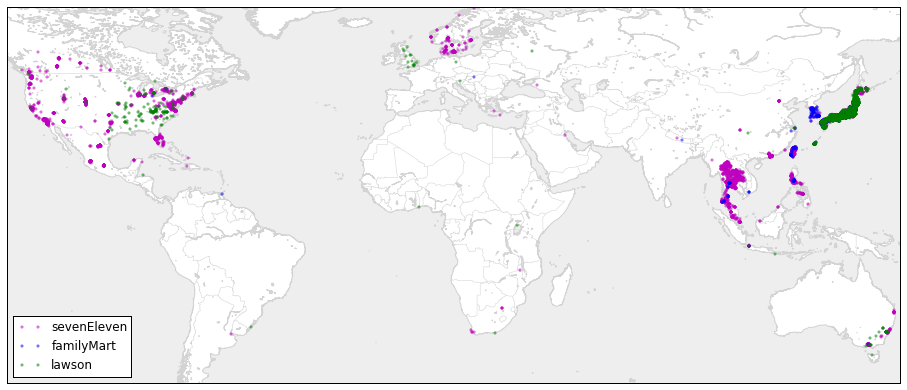

In [9]:
draw_map('world.png')

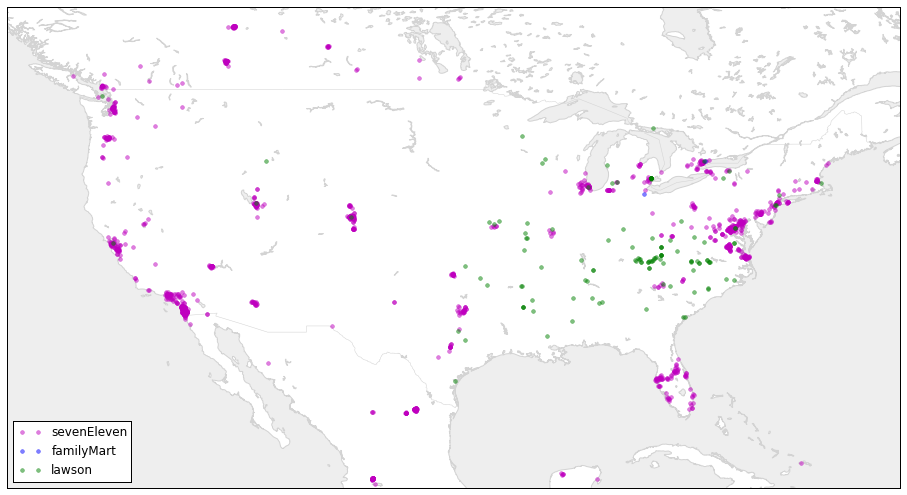

In [10]:
draw_map('America.png',-130,-65,20,55,8)

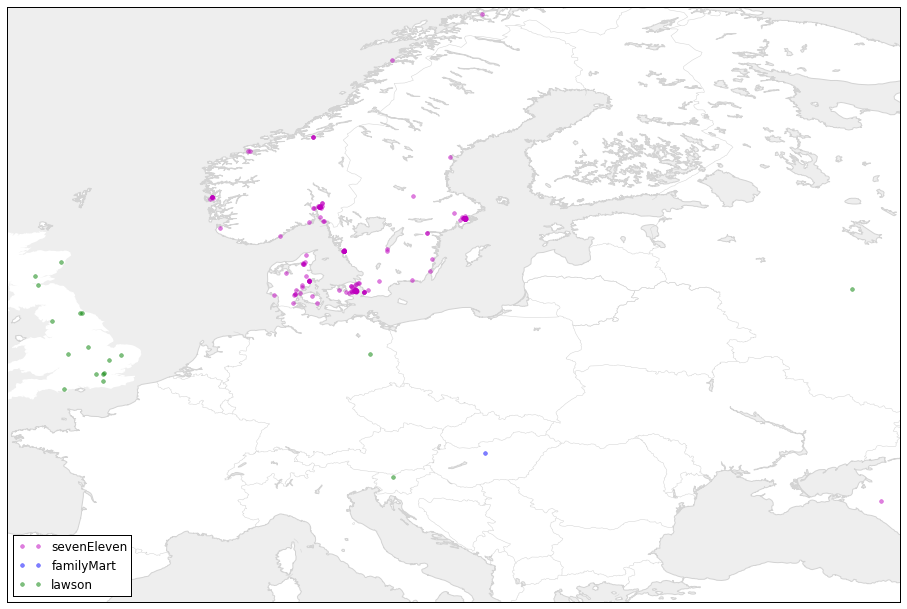

In [11]:
draw_map('Europe.png',-5,40,40,70,8)

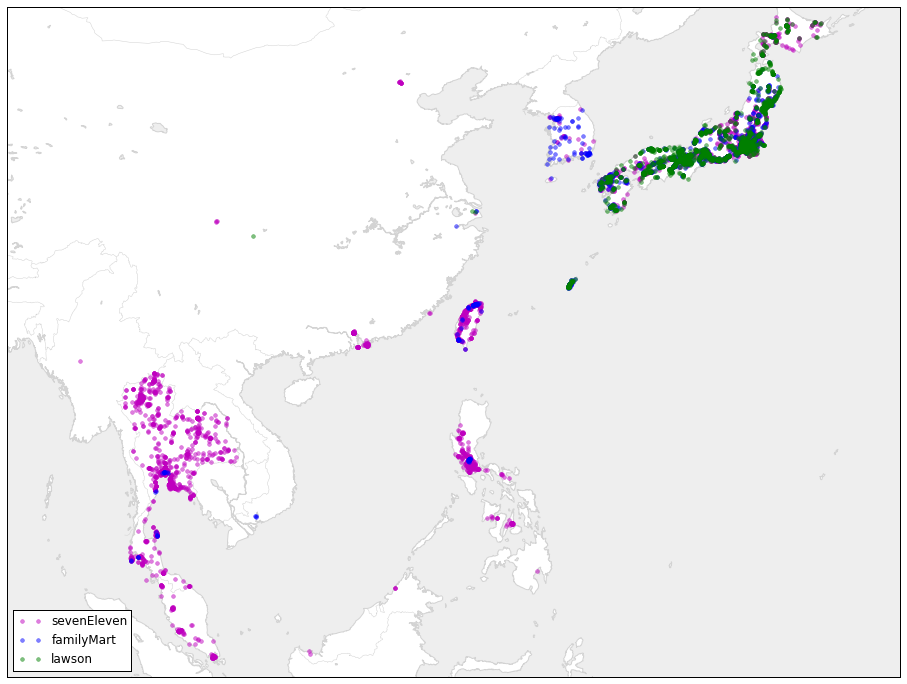

In [12]:
draw_map('Asia.png',90,150,0,45,8)